In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('./mushrooms.csv')
data.head()
# data.info()
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [3]:
# X = data.drop(['class'], axis=1)
# Y = data['class']
# # onehot encoding for x
# enc = OneHotEncoder().fit(X)
# labelEncoding for y

#split into training and testing data

In [4]:
# take a look at all of the unique values for each column
for col in data.columns:
    print(col, ": ", len(data[col].unique()), " | ", data[col].unique())

# note: there are 2480 values of '?' in the stalk-root column
print(data['stalk-root'].value_counts())

# replace those '?' with NaN
data = data.replace('?', np.nan)

# check to make sure they were properly replaced
print(data['stalk-root'].value_counts())

class :  2  |  ['p' 'e']
cap-shape :  6  |  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface :  4  |  ['s' 'y' 'f' 'g']
cap-color :  10  |  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises :  2  |  ['t' 'f']
odor :  9  |  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment :  2  |  ['f' 'a']
gill-spacing :  2  |  ['c' 'w']
gill-size :  2  |  ['n' 'b']
gill-color :  12  |  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape :  2  |  ['e' 't']
stalk-root :  5  |  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring :  4  |  ['s' 'f' 'k' 'y']
stalk-surface-below-ring :  4  |  ['s' 'f' 'y' 'k']
stalk-color-above-ring :  9  |  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring :  9  |  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type :  1  |  ['p']
veil-color :  4  |  ['w' 'n' 'o' 'y']
ring-number :  3  |  ['o' 't' 'n']
ring-type :  5  |  ['p' 'e' 'l' 'f' 'n']
spore-print-color :  9  |  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population :  6  |  ['s' 'n' 'a' 'v' 'y' 'c']
habitat :  7  | 

In [5]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
print("shape: ", data.shape)

# encoding the data
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
    
data.head()

shape:  (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [7]:
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

# train, test = train_test_split(data, test_size=0.2)

# # seperate the dataset into features and target
# X_train = train.drop(['class'],axis=1)
# y_train = train['class']

# X_test = test.drop(['class'],axis=1)
# y_test = test['class']



# print(y_train.head())
# print(y_test.head())
# X_train.head()
# X_test.head()
# use a tree-based feature selection to remove irrelevant features
# clf = ExtraTreesClassifier(n_estimators=50)
# clf = clf.fit(X.values, y.values)
# clf.feature_importances_  

# model = SelectFromModel(clf, prefit=True)
# X_new = model.transform(X.values)
# X_new.shape           
# new = model.transform(X.values)
# print(X_new.shape)           

# X = X_new

# y.head()

# X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=4)

# print(y.head())
# print(X.head())
# X.corr



(8124, 23)
(8124, 23)


In [8]:
def training_perceptron(learning_rate, feature_vectors, label_vector, w):
    mistakes = 0
    t = 0
    # for each training example
    for x_t in feature_vectors:        
        y_hat = np.sign(np.dot(x_t, w))     # predict label using current weights
        y = label_vector[t]    # the correct label
        # w_avg += w
        # print(np.shape(y))
        # print(x_t, w)
        # print(y, y_hat)
        if y * y_hat <= 0:     # if the predicted label is wrong
            mistakes += 1   
            if y == 1:
                w = np.add(w, learning_rate * 1 * x_t)   
            elif y == -1:
                # note: when I tried to multiply x_t here by -1 I kept getting a numpy error
                w = np.subtract(w, learning_rate*x_t)   
            elif y == 0:
                w = np.subtract(w, learning_rate * x_t)   
            else:
                raise ValueError  # make note of the number of mistakes for each itr
              # update the weights
        t += 1

    return w, mistakes #, w_avg


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
# from matplotlib import pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# import matplotlib

# splitting data into features and labels. Putting them into numpy format so sklearn can unserstand
X = data.drop(['class'],axis=1).to_numpy()
y = data['class'].to_numpy()



perceptron:  0.7967176426706453
[   -95    922  -1214  -1416  -1783    -45   -717   1311 -10990   -359
   1392  -1413  -1366  -2491  -2425      0   -136   -496  -4459   1677
   1386   1784]
1
6
16
17
0.9668034315553897
perceptron:  0.9324878776575904


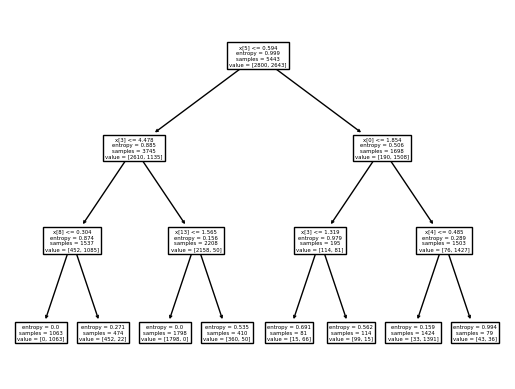

In [10]:
# seperating data for perceptron
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=10)

# training a perceptron classifier
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
l = perceptron.predict(X_test)
print("perceptron: ", metrics.accuracy_score(y_test, l))

# feature pruning
w_avg = [0] * 22
w = [0] * 22
w, mistakes = training_perceptron(1, X_train, y_train,w)
# print dataframe to compare to weights
# the weights with the highest |val| their index will be the features that are the most important
print(w)
data.head()

        
# drop the unwanted columns
# pruned_data = data.drop(['class'],axis=1)
'''
    when i did this dropping my perceptron and decision tree whent down in quality
'''
# print out the least affecting weights with relation to origional raw data
# for i in range(len(w)):
#     if w[i] < 500 and w[i] > -500:
#         # add 1 because the training data drops the first dataframe
#         print(i + 1)
        
# df2 = data.drop(data.columns[[1,6,10,16,17,18]],axis = 1)
'''
    second attempt: this one drastically improved perceptron and had a small improvement on decision tree
'''
for i in range(len(w)):
    if w[i] < 200 and w[i] > -200:
        # add 1 because the training data drops the first dataframe
        print(i + 1)
df2 = data.drop(data.columns[[1,6,16,17]],axis = 1)

df2.head()

# splitting data into features and labels. Putting them into numpy format so sklearn can unserstand
X = df2.drop(['class'],axis=1).to_numpy()
y = df2['class'].to_numpy()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.33,random_state=10)

# Initial decision tree, overfit due to not having a maxdepth
# we can see 
'''
    Initial decision tree. We can see that it is overfitting to the data to have 100% accuracy.
    We can see that if no max height is defined that the tree has a depth of 7.
    This will likely lead to poor generalization
'''
dtc = DecisionTreeClassifier(max_depth=3, criterion="entropy", splitter="random")
dtc.fit(X_train2,y_train2)

l = dtc.predict(X_test2)
print(metrics.accuracy_score(y_test2, l))

plot_tree(dtc)

# training a perceptron classifier
perceptron = Perceptron()
perceptron.fit(X_train2, y_train2)
l = perceptron.predict(X_test2)
print("perceptron: ", metrics.accuracy_score(y_test2, l))

0.9500186497575531


[Text(0.5, 0.875, 'x[7] <= 0.673\nentropy = 0.999\nsamples = 5443\nvalue = [2800, 2643]'),
 Text(0.25, 0.625, 'x[4] <= 4.443\nentropy = 0.885\nsamples = 3745\nvalue = [2610, 1135]'),
 Text(0.125, 0.375, 'x[11] <= 1.822\nentropy = 0.874\nsamples = 1537\nvalue = [452, 1085]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 991\nvalue = [0, 991]'),
 Text(0.1875, 0.125, 'entropy = 0.663\nsamples = 546\nvalue = [452, 94]'),
 Text(0.375, 0.375, 'x[17] <= 1.558\nentropy = 0.156\nsamples = 2208\nvalue = [2158, 50]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 1798\nvalue = [1798, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.535\nsamples = 410\nvalue = [360, 50]'),
 Text(0.75, 0.625, 'x[6] <= 0.861\nentropy = 0.506\nsamples = 1698\nvalue = [190, 1508]'),
 Text(0.625, 0.375, 'x[19] <= 6.541\nentropy = 0.345\nsamples = 1534\nvalue = [99, 1435]'),
 Text(0.5625, 0.125, 'entropy = 0.886\nsamples = 326\nvalue = [99, 227]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 1208\nvalue = [0, 1208]'),
 Tex

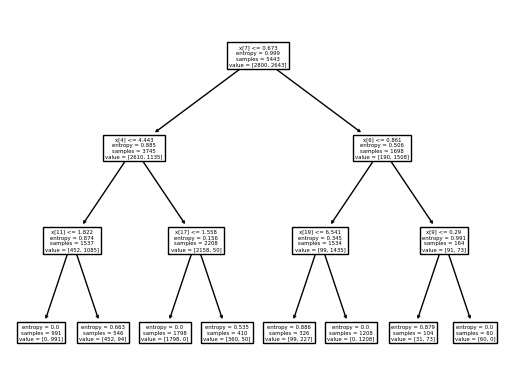

In [11]:
# Initial decision tree, overfit due to not having a maxdepth
# we can see 
'''
    Initial decision tree. We can see that it is overfitting to the data to have 100% accuracy.
    We can see that if no max height is defined that the tree has a depth of 7.
    This will likely lead to poor generalization
'''
dtc = DecisionTreeClassifier(max_depth=3, criterion="entropy", splitter="random")
dtc.fit(X_train,y_train)

l = dtc.predict(X_test)
print(metrics.accuracy_score(y_test, l))

plot_tree(dtc)

0.990029542097489
0.991506646971935
1.0
0.9966765140324964
0.9796898079763663
0.9855982274741507
0.9878138847858198
0.9970457902511078
0.9944608567208272
0.9807976366322009
0.9944050727340544
1.0
[0 1 0 ... 1 1 1]
[0 1 0 ... 1 1 1]
(5443, 18)
(5443,)
(2681, 18)


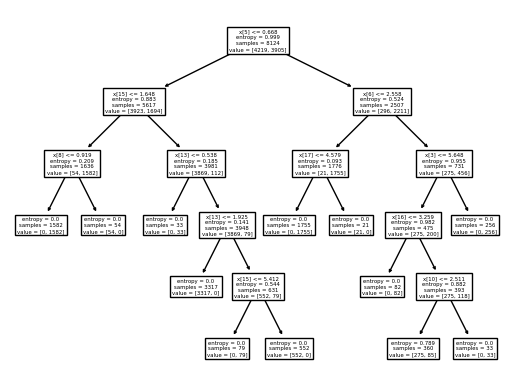

In [12]:


# classifier list for voting classifier
classifiers = []

n = len(y)

# bootstraping for voting classifier
for i in range(10):
    classifiers.append(DecisionTreeClassifier(max_depth=5, criterion="entropy",splitter="random"))

    samples = np.random.randint(n, size=n)
    X_train = X[samples] 
    y_train = y[samples]
    
    samples = np.random.randint(n, size=n//3)
    X_test = X[samples] 
    y_test = y[samples]
    
    
    classifiers[i].fit(X_train, y_train)
    l = classifiers[i].predict(X_test)
    print(metrics.accuracy_score(y_test, l))

    
# input to ensamble classifier
estimators = []
for i in range(10):
    name = 'dt' + str(i)
    estimators.append((name, classifiers[i]))

# creating voting and random forest classifiers 
voting_classifier = VotingClassifier(estimators=estimators)
random_forest = RandomForestClassifier(n_estimators=10)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=10)

# training voting classifer
voting_classifier.fit(X_train, y_train)
l = voting_classifier.predict(X_test)
print(metrics.accuracy_score(y_test, l))

# training random forest classifier
random_forest.fit(X_train, y_train)
l = random_forest.predict(X_test)
print(metrics.accuracy_score(y_test, l))

# decision trees have high accuracy already .98
# even though random state the ensamble always came to 1.0 bc they are combining already high decision trees


# visualization for decision trees
plot_tree(classifiers[0])


# X_train = X_new


print(l)
print(y_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

In [13]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score


clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

k_folds = KFold(n_splits = 10)

scores = cross_val_score(clf, X_test, y_test, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))



Cross Validation Scores:  [1.         1.         1.         1.         1.         1.
 1.         0.99626866 1.         1.        ]
Average CV Score:  0.9996268656716417
Number of CV Scores used in Average:  10
